**Load libraries**

In [1]:
import pandas as pd               #data loading and manipulation
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #statistical plotting

**Read diabetes data**

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


**Setting PyCaret Environment**

In [1]:
from pycaret.classification import *

In [8]:
dia_clf = setup(data = diabetes,
                   target = 'diabetes',
                   numeric_features=["pregnant"],
                   train_size = 0.8,
                   normalize=True,
                   session_id=123)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"neg: 0, pos: 1"
3,Original Data,"(392, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


**Comparing models**

In [9]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.788700,0.860800,0.654500,0.711300,0.675100,0.520400
1,Logistic Regression,0.775900,0.856200,0.557300,0.720800,0.621100,0.467700
2,Gradient Boosting Classifier,0.776000,0.852600,0.644500,0.681500,0.656900,0.492200
3,Linear Discriminant Analysis,0.772700,0.852100,0.558200,0.709600,0.616100,0.460800
4,CatBoost Classifier,0.788400,0.844000,0.652700,0.710900,0.674700,0.519200
5,Extra Trees Classifier,0.782300,0.843000,0.604500,0.722700,0.649100,0.494300
6,Light Gradient Boosting Machine,0.760000,0.842400,0.614500,0.664900,0.628200,0.454000
7,Naive Bayes,0.775700,0.841200,0.682700,0.667800,0.672300,0.502900
8,Random Forest Classifier,0.788500,0.826600,0.565500,0.757400,0.636400,0.492800
9,Quadratic Discriminant Analysis,0.756900,0.824000,0.569100,0.664200,0.608900,0.434900


**Tune model**

In [10]:
tuned_xgb = tune_model("xgboost", optimize = "AUC", n_iter = 500)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8750,0.8485,0.8182,0.8182,0.8182,0.7229
1,0.7812,0.8442,0.6364,0.7000,0.6667,0.5044
2,0.8438,0.9610,0.8182,0.7500,0.7826,0.6610
3,0.7097,0.8381,0.5000,0.5556,0.5263,0.3178
4,0.8387,0.8857,0.6000,0.8571,0.7059,0.5995
5,0.8065,0.9333,0.6000,0.7500,0.6667,0.5327
6,0.8065,0.9095,0.7000,0.7000,0.7000,0.5571
7,0.6452,0.7476,0.7000,0.4667,0.5600,0.2821
8,0.7097,0.6667,0.5000,0.5556,0.5263,0.3178
9,0.7419,0.8227,0.5455,0.6667,0.6000,0.4123


In [11]:
tuned_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=60,
              min_child_weight=3, missing=None, n_estimators=600, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.1, verbosity=0)

**Confusion Matrix**

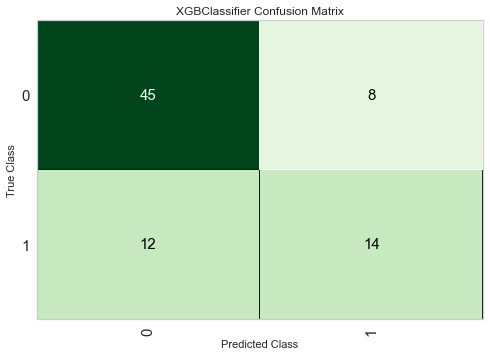

In [12]:
plot_model(tuned_xgb, plot = 'confusion_matrix')

**Model Plots**

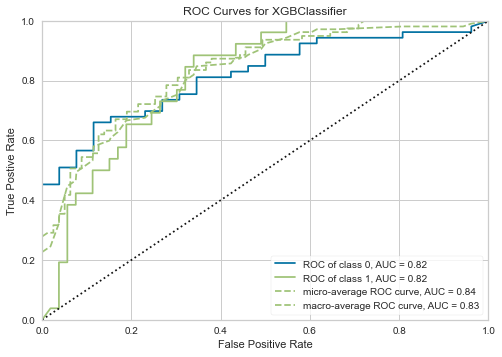

In [13]:
plot_model(tuned_xgb, plot = 'auc')

**Precision Recall Plot**

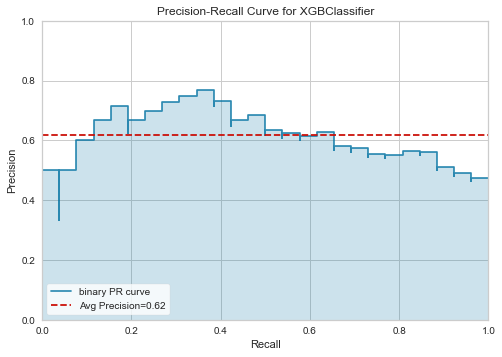

In [14]:
plot_model(tuned_xgb, plot = 'pr')

**Feature Importance Plot**

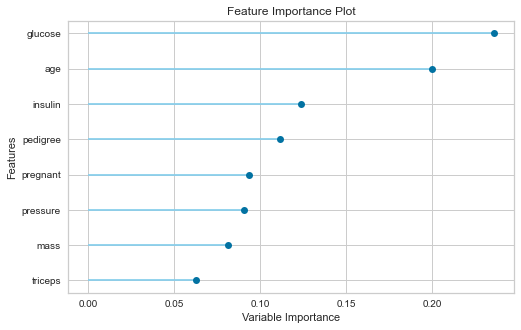

In [15]:
plot_model(tuned_xgb, plot='feature')

**Calibration Plot**

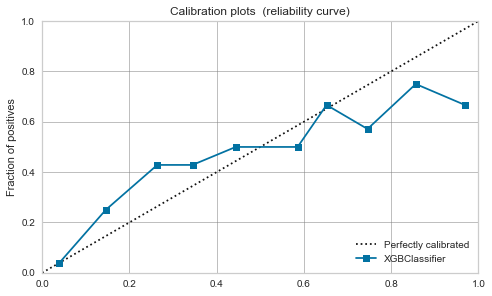

In [16]:
plot_model(tuned_xgb, plot='calibration')

**Model Evaluation Interface**

In [3]:
evaluate_model(tuned_xgb)

NameError: name 'tuned_xgb' is not defined

**Model Interpretation**

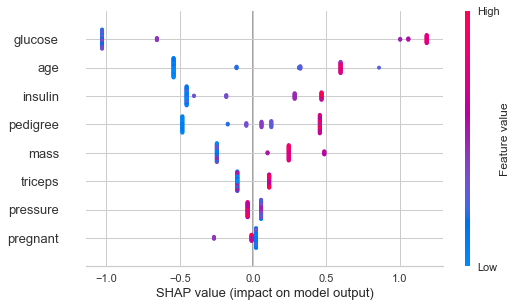

In [18]:
interpret_model(tuned_xgb, plot = 'summary')

**Prediction on holdout set**

In [19]:
predict_model(tuned_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7468,0.8189,0.5385,0.6364,0.5833,0.4033


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,Label,Score
0,-0.717427,-0.182586,1.389146,-0.489899,-0.093151,0.201430,-0.347912,0.896685,1,0,0.2585
1,-0.093854,-0.312366,-1.655691,-1.822851,-0.598670,-0.510954,0.298377,-0.575671,0,0,0.0738
2,-0.717427,-0.539481,-0.053146,-0.109055,-0.177404,0.158687,-1.104330,-0.870142,0,0,0.0784
3,0.217932,0.206754,-0.854419,-1.632429,0.631425,-0.795907,0.011460,0.013271,0,1,0.6464
4,-1.029213,0.466314,-0.213400,-1.442008,-0.067875,-1.180594,-1.101432,-0.968299,0,0,0.3447
...,...,...,...,...,...,...,...,...,...,...,...
74,-0.717427,-0.896376,0.267364,-0.775531,-0.699773,-1.023870,0.434590,0.504056,0,0,0.1849
75,0.217932,-1.058601,1.389146,1.699951,-0.859854,0.657356,-0.466736,-0.183043,0,0,0.2440
76,-0.405640,-0.474591,-0.694164,0.271788,-0.843004,-1.123604,-1.144904,-0.968299,0,0,0.0373
77,-0.405640,0.012084,-1.815946,0.271788,0.075355,1.284253,-0.008828,-0.477514,0,0,0.1849


**Model finalization**

In [21]:
final_gbc = finalize_model(tuned_xgb)

In [22]:
final_gbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=60,
              min_child_weight=3, missing=None, n_estimators=600, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.1, verbosity=0)

**Saving final model**

In [23]:
save_model(tuned_xgb,'Final tuned_xgb Model 11July2020')

Transformation Pipeline and Model Succesfully Saved


**Loading saved model**

In [24]:
saved_final_lightxgb = load_model('Final tuned_xgb Model 11July2020')

Transformation Pipeline and Model Sucessfully Loaded


**Prediction**

In [25]:
new_prediction = predict_model(saved_final_lightxgb)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7468,0.8189,0.5385,0.6364,0.5833,0.4033


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,Label,Score
0,-0.717427,-0.182586,1.389146,-0.489899,-0.093151,0.201430,-0.347912,0.896685,1,0,0.2585
1,-0.093854,-0.312366,-1.655691,-1.822851,-0.598670,-0.510954,0.298377,-0.575671,0,0,0.0738
2,-0.717427,-0.539481,-0.053146,-0.109055,-0.177404,0.158687,-1.104330,-0.870142,0,0,0.0784
3,0.217932,0.206754,-0.854419,-1.632429,0.631425,-0.795907,0.011460,0.013271,0,1,0.6464
4,-1.029213,0.466314,-0.213400,-1.442008,-0.067875,-1.180594,-1.101432,-0.968299,0,0,0.3447
